Importing libraries

In [1]:
from sklearn import metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime as dt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

Loading the data

In [2]:
members = pd.read_csv('/content/members.csv')
songextrainfo = pd.read_csv('/content/song_extra_info.csv')
song = pd.read_csv('/content/songs.csv')
train = pd.read_csv('/content/train.csv')

Anayzing the data

In [3]:
members.head(100)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
95,8sEEszoN7JW047C9Qt5XN29r7UJwsb5J6RWTz8gLlqE=,1,0,NaN,7,20130604,20171004
96,5aK/dB0N/7AuXaOmBdXsawoIgJ3I6332BH5tBvChWt4=,11,34,female,9,20120627,20171022
97,1yd9fOVZVhdmRiBQSGNNIkt1auPjBJ1nSHWhVHLR9Fg=,13,0,NaN,4,20151107,20170930
98,hZ4kF/3r+IOCcO+h0oPXypRkx17TF0LI0tq1qATx4/4=,4,32,male,3,20120606,20120613


members dataframe - Member serial no, 

In [4]:
songextrainfo.head(100)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
95,BzLojXj3nde+kOyOFx0Q0zDxyxbitlsdfhhg2Q7xDjU=,What Time Is It,USWD10731999
96,5T18vNgsFtCKs03RiXei/IdH+aJudCEp1WanSK1eDjY=,最懂得愛你,TWB519805906
97,jgkHcQGMojHLaYUWGxXhw/NaPsxD05Z3X3OVea1HwxI=,愛的鼓勵 (Woo),TWA531480009
98,wClbvD0nyZ///xIZwcpgnZVq5R6AXZJPnAJ1bUo6obU=,你和我 (You and Me),JPU901603290


Song_extra_info - Contains unique song_id, name of the song, isrc uniquely determines the song.

In [5]:
song.head(100)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
95,/XuPT2n3/VjGZuKKCxEwj97F6DRWiyBmFQpoZN8I5/M=,219324.0,1609|2107,Kyary Pamyu Pamyu (きゃりーぱみゅぱみゅ),Yasutaka Nakata,Yasutaka Nakata,17.0
96,XCLTSwcKdd4emAdtdyYPKU8XPCJwh0GH2JwQhI4Bf0U=,186906.0,2022,Skillet,John L. Cooper| Korey Cooper,NaN,52.0
97,Z0J/qtjv7A5dtkS+xgQ173lvH/s47INk3vbzdC0Y99Y=,235937.0,465,梁靜茹 (Fish Leong),NaN,NaN,3.0
98,O80yuLYpg2y/512HcLB+gzaH/waW4mC50B1q3mg2qio=,166321.0,921,Alan Silvestri,Alan Silvestri,NaN,52.0


In [6]:
train.head(100)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
95,Eaq21N7ijazDjnqU5v1jjWewJopGxgZxkKr4GIq7JTs=,BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8=,my library,NaN,local-library,1.0
96,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,b+OlR6qF0gzG++m+sYrOnf7bJF6WmXv51xGLBpmugxg=,my library,Local playlist more,local-library,1.0
97,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,9tNXaK/yKJfTcoWLRFw6HXplizDxq4bFvzs3scmesCU=,my library,Local playlist more,local-library,1.0
98,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,dKsoBHe5cVhyQSU8CimXs4ysaAky4RNgBwIafHaLkik=,my library,Local playlist more,local-library,1.0


Train dataset - member serialno., song_id of the the song the members listens to, target - says whether the song is listened more than once in the month

In [7]:
m1 = pd.merge(train,song, on='song_id',how='left')
m2 = pd.merge(m1,songextrainfo, on='song_id',how='left')
msongs = pd.merge(m2,members, on='msno',how='left')
#del m1,m2,members,songextrainfo,song,train
print('Columns of the merge dataset (msongs) are: \n',msongs.columns)

Columns of the merge dataset (msongs) are: 
 Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time',
       'expiration_date'],
      dtype='object')


In [8]:
print(msongs.head(10))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
5  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
6  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
7  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
8  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
9  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
5  3Hg5kugV1S0wzEVLAEfqj

Analysing the data


---



---



In [9]:
msongs.shape

(70272, 20)

In [ ]:
#Algorithm to find the top listened songs.
t_songs =msongs[msongs['target']==1]
t_songs['rat']=1
top_songs=t_songs.groupby(by=['name'])['rat'].sum()
#print(msongs.columns)
#print(t_songs[12:12])
sorted_top = top_songs.sort_values(ascending=False)
print(sorted_top.head())

name
你，好不好？ (How Have You Been?)    365
不該                             331
默                              294
好愛好散 (Blue Love Theme)         280
Closer                         267
Name: rat, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#Algorithm to find the least listened songs.
t_songs =msongs[msongs['target']==0]
t_songs['rat']=1
top_songs=t_songs.groupby(by=['name'])['rat'].sum()
#print(msongs.columns)
#print(t_songs[12:12])
sorted_top = top_songs.sort_values(ascending=False)
print(sorted_top.tail())

name
Susan說                 1
Sway                   1
Sway It| Hula Girl     1
Sweet Child O' Mine    1
희망 / 별이삼우물정            1
Name: rat, dtype: int64


<ipython-input-10-f55def61092f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_songs['rat']=1


In [ ]:
#Getting the sum of null values
print(msongs.isnull().sum())

msno                          0
song_id                       1
source_system_tab           316
source_screen_name         4371
source_type                 208
target                        1
song_length               55101
genre_ids                 55813
artist_name               55101
composer                  64764
lyricist                  73721
language                  55101
name                      59004
isrc                      62953
city                          1
bd                            1
gender                    39343
registered_via                1
registration_init_time        1
expiration_date               1
dtype: int64


Data Cleaning

In [11]:
#Finding the duplicates
msongs.duplicated().sum()

0

In [12]:
msongs.isnull().mean()

msno                      0.000000
song_id                   0.000014
source_system_tab         0.002960
source_screen_name        0.037227
source_type               0.001765
target                    0.000014
song_length               0.621243
genre_ids                 0.626238
artist_name               0.621243
composer                  0.699226
lyricist                  0.768912
language                  0.621243
name                      0.698927
isrc                      0.726406
city                      0.000014
bd                        0.000014
gender                    0.382741
registered_via            0.000014
registration_init_time    0.000014
expiration_date           0.000014
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

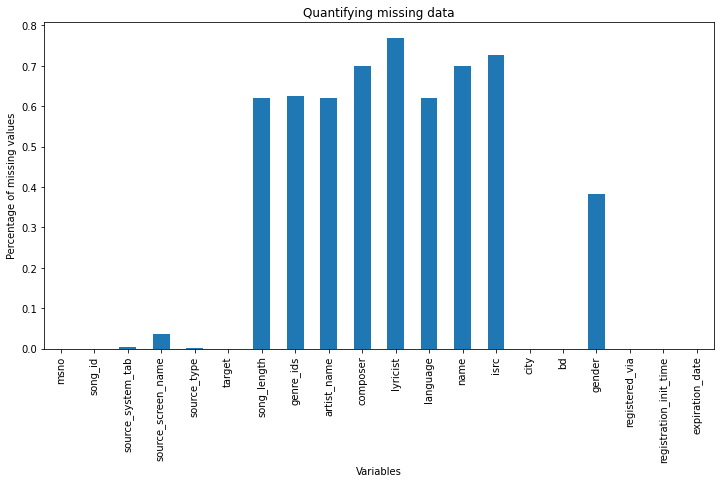

In [13]:
#Quantifying the missing data
msongs.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [14]:
#Splitting the integer valued columns.
integer_columns=msongs.select_dtypes(include=['int64','float64']).columns.tolist()
print(integer_columns)

['target', 'song_length', 'language', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date']


Filling nullvalues

---



---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


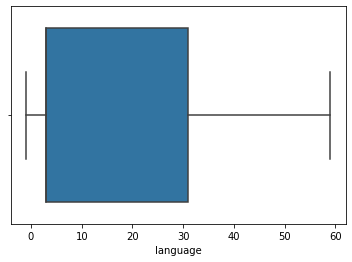

In [15]:
#Filling the integer data having outliers(skewed data) with mode and no outliers(non-skewed) with mean.
#fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(msongs.language)
#msongs.boxplot('target')
#msongs.boxplot(column=['target', 'song_length', 'language', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date'])

In [16]:
msongs['language'].fillna(msongs['language'].mode()[0], inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


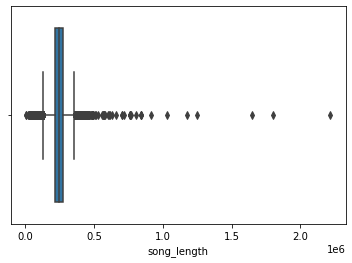

In [17]:
sns.boxplot(msongs.song_length)

In [18]:
msongs['song_length'].fillna(msongs['song_length'].mode()[0], inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


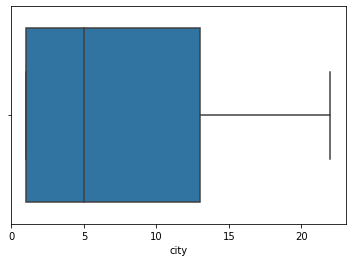

In [19]:
sns.boxplot(msongs.city)

In [20]:
msongs['city'].fillna(msongs['city'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


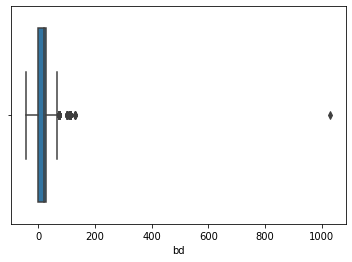

In [21]:
sns.boxplot(msongs.bd)

In [22]:
msongs['bd'].fillna(msongs['bd'].mode(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


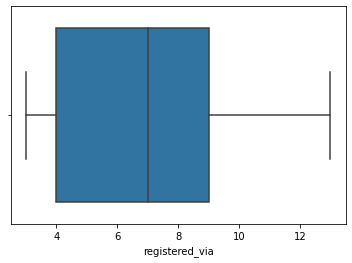

In [23]:
sns.boxplot(msongs.registered_via)

In [24]:
msongs['registered_via'].fillna(msongs['registered_via'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


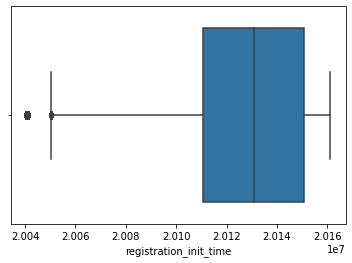

In [25]:
sns.boxplot(msongs.registration_init_time)

In [26]:
msongs['registration_init_time'].fillna(msongs['registration_init_time'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


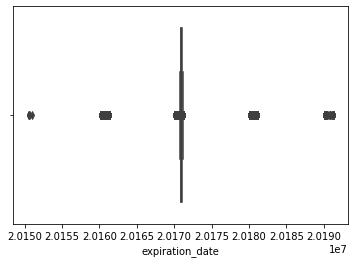

In [27]:
sns.boxplot(msongs.expiration_date)

In [28]:
msongs['expiration_date'].fillna(msongs['expiration_date'].mode(), inplace = True)

In [29]:
print(msongs.isnull().sum())

msno                          0
song_id                       1
source_system_tab           208
source_screen_name         2616
source_type                 124
target                        1
song_length                   0
genre_ids                 44007
artist_name               43656
composer                  49136
lyricist                  54033
language                      0
name                      49115
isrc                      51046
city                          0
bd                            1
gender                    26896
registered_via                0
registration_init_time        0
expiration_date               1
dtype: int64


In [30]:
msongs['song_id'].fillna(msongs['song_id'].mode()[0], inplace = True)
msongs['source_system_tab'].fillna(msongs['source_system_tab'].mode()[0], inplace = True)
msongs['source_screen_name'].fillna(msongs['source_screen_name'].mode()[0], inplace = True)
msongs['source_type'].fillna(msongs['source_type'].mode()[0], inplace = True)
msongs['genre_ids'].fillna(msongs['genre_ids'].mode()[0], inplace = True)
msongs['artist_name'].fillna(msongs['artist_name'].mode()[0], inplace = True)
msongs['composer'].fillna(msongs['composer'].mode()[0], inplace = True)
msongs['lyricist'].fillna(msongs['lyricist'].mode()[0], inplace = True)
msongs['name'].fillna(msongs['name'].mode()[0], inplace = True)
msongs['isrc'].fillna(msongs['isrc'].mode()[0], inplace = True)
msongs['gender'].fillna(msongs['gender'].mode()[0], inplace = True)
msongs['expiration_date'].fillna(msongs['expiration_date'].mode()[0], inplace = True)
msongs['target'].fillna(6, inplace = True)
msongs['bd'].fillna(6, inplace = True)


In [31]:
print(msongs.isnull().sum())

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64


Normalization

---



---



In [32]:
cateogry_columns=msongs.select_dtypes(include=['object']).columns.tolist()

In [33]:
le = LabelEncoder()
ohe = OneHotEncoder()
for i in cateogry_columns:
  msongs[i] = le.fit_transform(msongs[i])

EDA

In [34]:
msongs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70272 entries, 0 to 70271
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    70272 non-null  int64  
 1   song_id                 70272 non-null  int64  
 2   source_system_tab       70272 non-null  int64  
 3   source_screen_name      70272 non-null  int64  
 4   source_type             70272 non-null  int64  
 5   target                  70272 non-null  float64
 6   song_length             70272 non-null  float64
 7   genre_ids               70272 non-null  int64  
 8   artist_name             70272 non-null  int64  
 9   composer                70272 non-null  int64  
 10  lyricist                70272 non-null  int64  
 11  language                70272 non-null  float64
 12  name                    70272 non-null  int64  
 13  isrc                    70272 non-null  int64  
 14  city                    70272 non-null

In [35]:
msongs.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
count,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,7.027200e+04,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,70272.000000,7.027200e+04,7.027200e+04
mean,2585.454633,11429.287511,2.550860,7.194487,3.924010,0.756589,2.293893e+05,63.838542,1572.469775,2497.910377,1421.824695,8.507912,5410.022683,3887.650359,7.720397,17.770976,0.299166,6.833331,2.012658e+07,2.017162e+07
std,1495.469600,6664.717484,1.439458,2.411830,1.577736,0.429641,3.371357e+04,11.947872,445.419612,612.174237,295.050860,14.483090,1617.516789,931.791722,6.492697,16.088980,0.457896,2.279848,2.962644e+04,3.343472e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.944000e+03,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,-43.000000,0.000000,3.000000,2.004033e+07,2.015052e+07
25%,1281.000000,5676.000000,3.000000,7.000000,3.000000,1.000000,2.193240e+05,65.000000,1658.000000,2664.000000,1472.000000,3.000000,5403.750000,4200.000000,1.000000,0.000000,0.000000,4.000000,2.011061e+07,2.017091e+07
50%,2577.000000,11318.000000,3.000000,7.000000,4.000000,1.000000,2.193240e+05,65.000000,1658.000000,2664.000000,1472.000000,3.000000,6258.000000,4200.000000,5.000000,22.000000,0.000000,7.000000,2.013082e+07,2.017093e+07
75%,3868.000000,17133.250000,3.000000,7.000000,5.000000,1.000000,2.248620e+05,65.000000,1658.000000,2664.000000,1472.000000,3.000000,6258.000000,4200.000000,13.000000,29.000000,1.000000,9.000000,2.015091e+07,2.017101e+07
max,5214.000000,23077.000000,7.000000,17.000000,10.000000,6.000000,2.216960e+06,122.000000,2478.000000,3560.000000,2173.000000,59.000000,6306.000000,5741.000000,22.000000,1030.000000,1.000000,13.000000,2.016120e+07,2.019123e+07


In [36]:
print('Duplicate values: ',msongs.duplicated().sum())

Duplicate values:  0


In [37]:
print(msongs.corr())

                            msno   song_id  source_system_tab  \
msno                    1.000000 -0.003554           0.010764   
song_id                -0.003554  1.000000           0.010113   
source_system_tab       0.010764  0.010113           1.000000   
source_screen_name      0.024544  0.000845           0.053600   
source_type            -0.016142  0.004576          -0.191103   
target                  0.010109 -0.009476           0.066648   
song_length             0.004507  0.006455           0.003081   
genre_ids               0.004052  0.012793           0.038110   
artist_name             0.000030  0.002514           0.006481   
composer                0.002669 -0.017597           0.033443   
lyricist                0.005453 -0.008875           0.023768   
language                0.004771  0.007505          -0.028464   
name                    0.001936 -0.020489           0.000077   
isrc                    0.004711 -0.015491          -0.017069   
city                    0

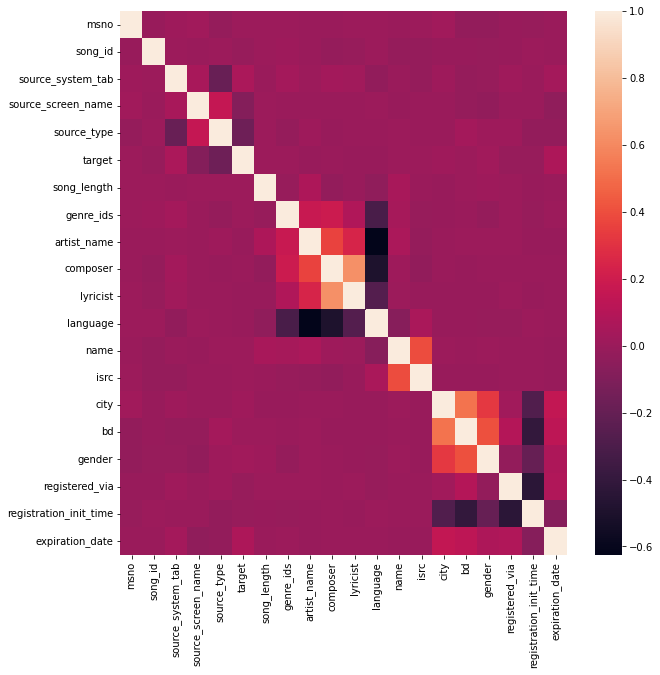

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(msongs.corr())

Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


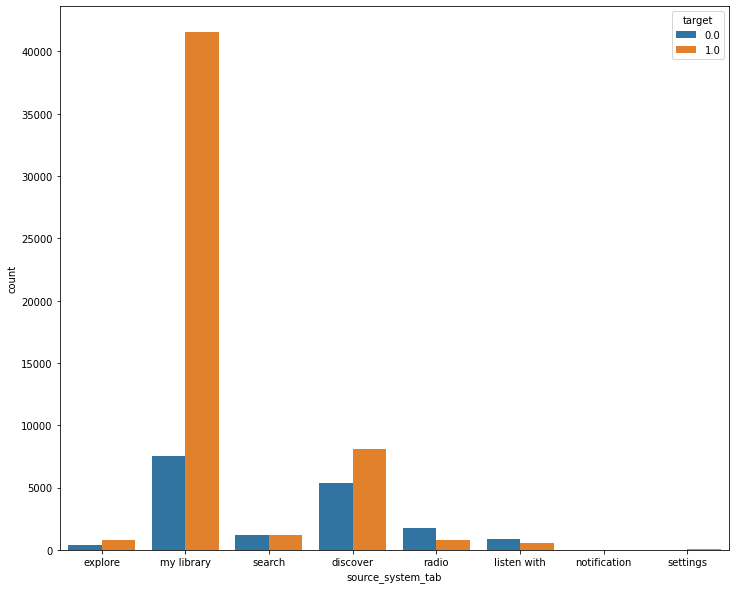

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'],hue=train['target'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'online-playlist'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'album'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'topic-article-playlist')]

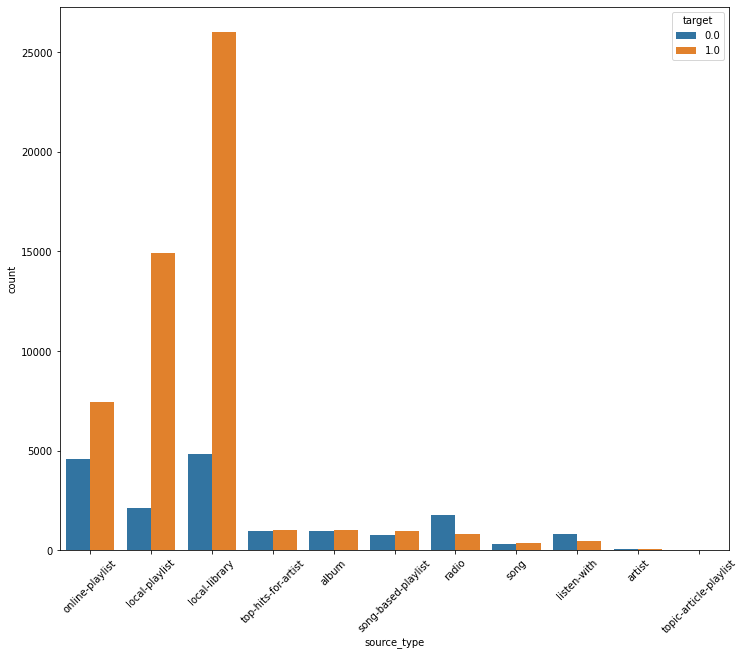

In [40]:
plt.figure(figsize=(12,10))
g=sns.countplot(train['source_type'],hue=train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

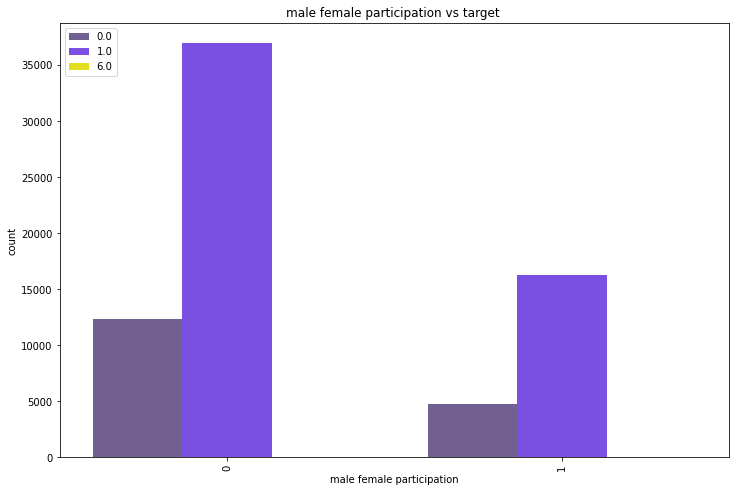

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(x="gender",data=msongs,palette=['#705898','#7038F8','yellow'],hue="target")
plt.xlabel("male female participation")
plt.ylabel("count")
plt.title("male female participation vs target ")
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

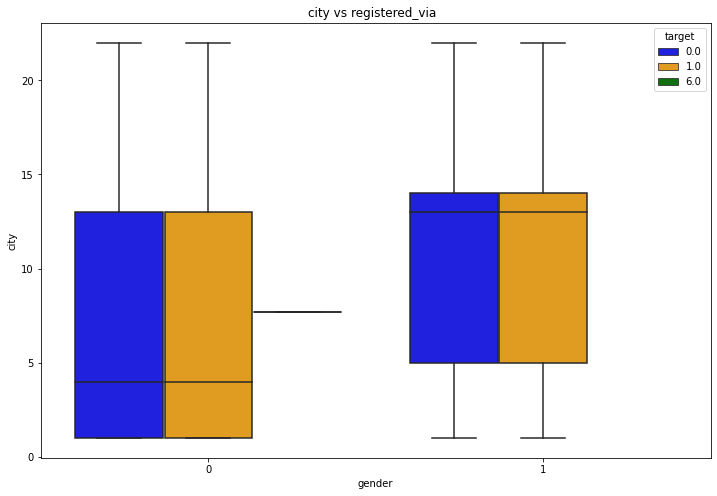

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(x="gender",y="city",data=msongs,palette=['blue','orange','green'],hue="target")
plt.xlabel("gender")
plt.ylabel("city")
plt.title("city vs registered_via  ")
plt.show()

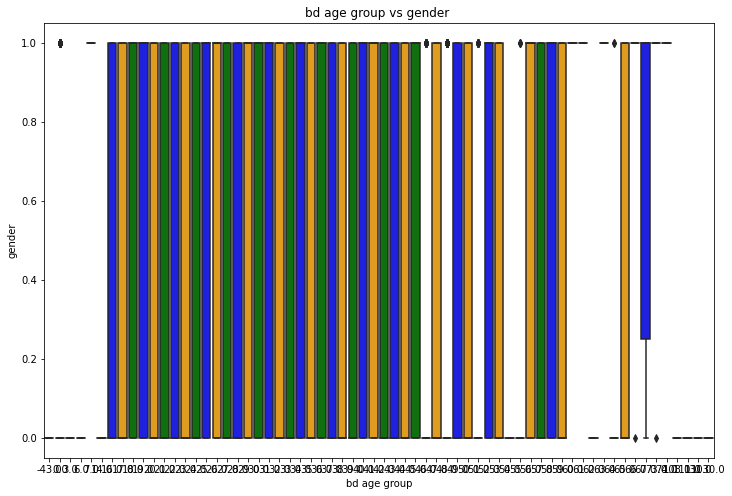

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(x="bd",y="gender",data=msongs,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

Model Selection

---



---



In [47]:
X = msongs.drop('target', axis = 1)
y = msongs.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [74]:
## 1) K-Nearest-Neighbours

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,Y_train)

knn_pred = knn_model.predict(X_test)
Knn_preds = pd.DataFrame({"Predicted":knn_pred,"Actual":Y_test})
Knn_preds



,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,0.0,1.0


In [75]:
Knn_TP = len(Knn_preds[(Knn_preds["Predicted"]==Knn_preds["Actual"])&(Knn_preds["Predicted"]==1)])
Knn_FP = len(Knn_preds[(Knn_preds["Predicted"]!=Knn_preds["Actual"])&(Knn_preds["Predicted"]==1)])
Knn_FN = len(Knn_preds[(Knn_preds["Predicted"]!=Knn_preds["Actual"])&(Knn_preds["Predicted"]==0)])
Knn_TN = len(Knn_preds[(Knn_preds["Predicted"]==Knn_preds["Actual"])&(Knn_preds["Predicted"]==0)])
print(Knn_TP,Knn_FP,Knn_FN,Knn_TN)
print("Rightly Classified: ",(Knn_TP+Knn_TN),"/",(Knn_TP+Knn_FP+Knn_FN+Knn_TN))
print("Wrongly Classified: ",(Knn_FP+Knn_FN),"/",(Knn_TP+Knn_FP+Knn_FN+Knn_TN))



11446 3532 1752 838
Rightly Classified:  12284 / 17568
Wrongly Classified:  5284 / 17568


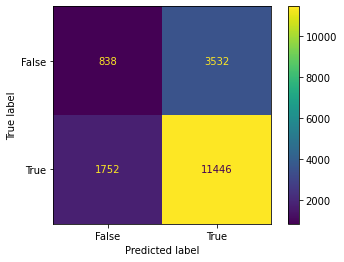


Accuracy on using  KNN algorithm is:  69.92258652094718


In [77]:
confusion_matrix = metrics.confusion_matrix(Y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
knn_accuracy = accuracy_score(knn_pred, Y_test)
print('\nAccuracy on using  KNN algorithm is: ',knn_accuracy*100);

In [76]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.19      0.24      4370
         1.0       0.76      0.87      0.81     13198

    accuracy                           0.70     17568
   macro avg       0.54      0.53      0.53     17568
weighted avg       0.65      0.70      0.67     17568



##KNN (k=10)

In [104]:

KNN_model1 = KNeighborsClassifier(n_neighbors=10)
KNN_model1.fit(X_train,Y_train)
KNN_y_preds = KNN_model1.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":Y_test})
KNN_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,0.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [105]:
KNN_TP1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP1,KNN_FP1,KNN_FN1,KNN_TN1)
print("Rightly Classified: ",(KNN_TP1+KNN_TN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))
print("Wrongly Classified: ",(KNN_FP1+KNN_FN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))

KNN_Accuracy1 = (KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1)
KNN_Precision1 = (KNN_TP1)/(KNN_TP1+KNN_FP1)
KNN_Recall1 = (KNN_TP1)/(KNN_TP1+KNN_FN1)
KNN_Specificity1 = (KNN_TN1)/(KNN_TN1+KNN_FP1)
KNN_F11 = (2*KNN_Precision1*KNN_Recall1)/(KNN_Precision1+KNN_Recall1)

12240 3842 958 528
Rightly Classified:  12768 / 17568
Wrongly Classified:  4800 / 17568


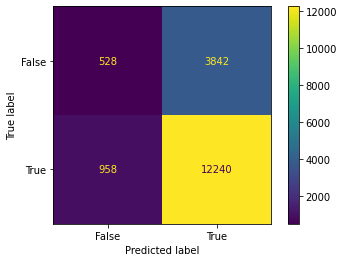

In [106]:
confusion_matrix = metrics.confusion_matrix(Y_test, KNN_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [107]:

print(classification_report(Y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.36      0.12      0.18      4370
         1.0       0.76      0.93      0.84     13198

    accuracy                           0.73     17568
   macro avg       0.56      0.52      0.51     17568
weighted avg       0.66      0.73      0.67     17568



 ###KNN (k=50) 

In [109]:
KNN_model2 = KNeighborsClassifier(n_neighbors=50)
KNN_model2.fit(X_train,Y_train)
KNN_y_preds = KNN_model2.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":Y_test})
KNN_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [110]:
KNN_TP2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP2,KNN_FP2,KNN_FN2,KNN_TN2)
print("Rightly Classified: ",(KNN_TP2+KNN_TN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))
print("Wrongly Classified: ",(KNN_FP2+KNN_FN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))

KNN_Accuracy2 = (KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2)
KNN_Precision2 = (KNN_TP2)/(KNN_TP2+KNN_FP2)
KNN_Recall2 = (KNN_TP2)/(KNN_TP2+KNN_FN2)
KNN_Specificity2 = (KNN_TN2)/(KNN_TN2+KNN_FP2)
KNN_F12 = (2*KNN_Precision2*KNN_Recall2)/(KNN_Precision2+KNN_Recall2)

13147 4296 51 74
Rightly Classified:  13221 / 17568
Wrongly Classified:  4347 / 17568


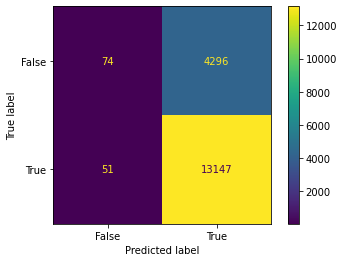

In [111]:
confusion_matrix = metrics.confusion_matrix(Y_test, KNN_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [113]:
print(classification_report(Y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.59      0.02      0.03      4370
         1.0       0.75      1.00      0.86     13198

    accuracy                           0.75     17568
   macro avg       0.67      0.51      0.45     17568
weighted avg       0.71      0.75      0.65     17568



In [70]:
## 2) Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

nav_bayes_model = GaussianNB()

nav_bayes_model.fit(X_train, Y_train)

nav_bayes_pred = nav_bayes_model.predict(X_test)
Nav_preds = pd.DataFrame({"Predicted":nav_bayes_pred,"Actual":Y_test})
Nav_preds


,Predicted,Actual
21617,0.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [162]:
NAV_TP = len(Nav_preds[(Nav_preds["Predicted"]==Nav_preds["Actual"])&(Nav_preds["Predicted"]==1)])
NAV_FP = len(Nav_preds[(Nav_preds["Predicted"]!=Nav_preds["Actual"])&(Nav_preds["Predicted"]==1)])
NAV_FN = len(Nav_preds[(Nav_preds["Predicted"]!=Nav_preds["Actual"])&(Nav_preds["Predicted"]==0)])
NAV_TN = len(Nav_preds[(Nav_preds["Predicted"]==Nav_preds["Actual"])&(Nav_preds["Predicted"]==0)])
print(nav_TP,nav_FP,nav_FN,nav_TN)
print("Rightly Classified: ",(nav_TP+nav_TN),"/",(nav_TP+nav_FP+nav_FN+nav_TN))
print("Wrongly Classified: ",(nav_FP+Log_FN),"/",(nav_TP+nav_FP+nav_FN+nav_TN))
NAV_Accuracy = (NAV_TP+NAV_TN)/(NAV_TP+NAV_FP+NAV_FN+NAV_TN)
NAV_Precision = (NAV_TP)/(NAV_TP+NAV_FP)
NAV_Recall = (NAV_TP)/(NAV_TP+NAV_FN)
NAV_Specificity = (NAV_TN)/(NAV_TN+NAV_FP)
NAV_F1 = (2*NAV_Precision*NAV_Recall)/(NAV_Precision+NAV_Recall)


11948 3042 1250 1328
Rightly Classified:  13276 / 17568
Wrongly Classified:  3042 / 17568


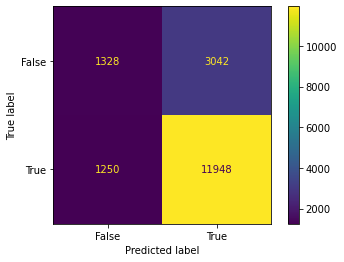


Accuracy on using Navie Bayes model is:  75.56921675774136


In [51]:
confusion_matrix = metrics.confusion_matrix(Y_test, nav_bayes_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print('\nAccuracy on using Navie Bayes model is: ',nav_bayes_accuracy*100)

In [72]:
print(classification_report(Y_test, nav_bayes_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.30      0.38      4370
         1.0       0.80      0.91      0.85     13198

    accuracy                           0.76     17568
   macro avg       0.66      0.60      0.62     17568
weighted avg       0.73      0.76      0.73     17568



In [64]:
## 3) Logistic Regression
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, Y_train)

log_reg_pred = log_reg_model.predict(X_test)
Log_preds = pd.DataFrame({"Predicted":log_reg_pred,"Actual":Y_test})
Log_preds


,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [96]:
Log_TP = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FP = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FN = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
Log_TN = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
print(Log_TP,Log_FP,Log_FN,Log_TN)
print("Rightly Classified: ",(Log_TP+Log_TN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
print("Wrongly Classified: ",(Log_FP+Log_FN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
Log_Accuracy = (Log_TP+Log_TN)/(Log_TP+Log_TN+Log_FP+Log_FN)
Log_Precision = (Log_TP)/(Log_TP+Log_FP)
Log_Recall = (Log_TP)/(Log_TP+Log_FN)
Log_Specificity = (Log_TN)/(Log_TN+Log_FP)
Log_F1 = (2*Log_Precision*Log_Recall)/(Log_Precision+Log_Recall)

13198 4370 0 0
Rightly Classified:  13198 / 17568
Wrongly Classified:  4370 / 17568


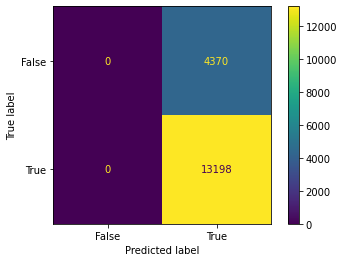


Accuracy on using Logistic Regression algorithm is:  75.1252276867031


In [53]:
confusion_matrix = metrics.confusion_matrix(Y_test, log_reg_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print('\nAccuracy on using Logistic Regression algorithm is: ',log_reg_accuracy*100)

In [66]:
print(classification_report(Y_test, log_reg_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4370
         1.0       0.75      1.00      0.86     13198

    accuracy                           0.75     17568
   macro avg       0.38      0.50      0.43     17568
weighted avg       0.56      0.75      0.64     17568



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
## 4) Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()

dec_tree_model.fit(X_train, Y_train)

dec_tree_pred = dec_tree_model.predict(X_test)
Decision_tree_preds = pd.DataFrame({"Predicted":dec_tree_pred,"Actual":Y_test})
Decision_tree_preds


,Predicted,Actual
21617,0.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,0.0,0.0
31571,1.0,1.0


In [95]:
Decision_TP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
Decision_TN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
print(Decision_TP,Decision_FP,Decision_FN,Decision_TN)
print("Rightly Classified: ",(Decision_TP+Decision_TN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
print("Wrongly Classified: ",(Decision_FP+Decision_FN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
Decision_Accuracy = (Decision_TP+Decision_TN)/(Decision_TP+Decision_TN+Decision_FP+Decision_FN)
Decision_Precision = (Decision_TP)/(Decision_TP+Decision_FP)
Decision_Recall = (Decision_TP)/(Decision_TP+Decision_FN)
Decision_Specificity = (Decision_TN)/(Decision_TN+Decision_FP)
Decision_F1 = (2*Decision_Precision*Decision_Recall)/(Decision_Precision+Decision_Recall)

11419 1799 1778 2571
Rightly Classified:  13990 / 17567
Wrongly Classified:  3577 / 17567


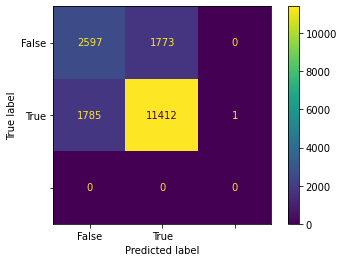


Accuracy on using Decision Tree model is:  79.74157559198542


In [55]:
confusion_matrix = metrics.confusion_matrix(Y_test, dec_tree_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print('\nAccuracy on using Decision Tree model is: ',dec_tree_accuracy*100);

In [61]:
print(classification_report(Y_test,dec_tree_pred ))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      4370
         1.0       0.86      0.87      0.86     13198
         6.0       0.00      0.00      0.00         0

    accuracy                           0.80     17568
   macro avg       0.49      0.48      0.48     17568
weighted avg       0.80      0.80      0.80     17568



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
## 5) Random Forest 

from sklearn.ensemble import RandomForestClassifier

rand_forest_model= RandomForestClassifier(max_depth=2)

rand_forest_model.fit(X_train,Y_train)

rand_forest_pred = rand_forest_model.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":rand_forest_pred,"Actual":Y_test})
RF_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [98]:
RF_TP1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RFTP,RFFP,RFFN,RFTN)
print("Rightly Classified: ",(RF_TP1+RF_TN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
print("Wrongly Classified: ",(RF_FP1+RF_FN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
RF_Accuracy1 = (RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1)
RF_Precision1 = (RF_TP1)/(RF_TP1+RF_FP1)
RF_Recall1 = (RF_TP1)/(RF_TP1+RF_FN1)
RF_Specificity1 = (RF_TN1)/(RF_TN1+RF_FP1)
RF_F11 = (2*RF_Precision1*RF_Recall1)/(RF_Precision1+RF_Recall1)


13197 4348 1 22
Rightly Classified:  14002 / 17568
Wrongly Classified:  3566 / 17568


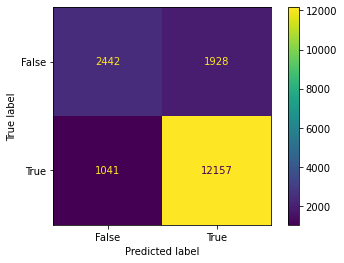


Accuracy on using Random Forest algorithm is:  83.09995446265937


In [57]:
confusion_matrix = metrics.confusion_matrix(Y_test, rand_forest_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
rand_forest_accuracy = accuracy_score(rand_forest_pred, Y_test)
print('\nAccuracy on using Random Forest algorithm is: ',rand_forest_accuracy*100);

In [82]:
print(classification_report(Y_test,rand_forest_pred ))

              precision    recall  f1-score   support

         0.0       0.96      0.01      0.01      4370
         1.0       0.75      1.00      0.86     13198

    accuracy                           0.75     17568
   macro avg       0.85      0.50      0.43     17568
weighted avg       0.80      0.75      0.65     17568



##Random Forest (Max 5 features in Bootstraping)

In [170]:

RF_model2 = RandomForestClassifier(max_depth=5)
RF_model2.fit(X_train,Y_train)
RF_y_preds = RF_model2.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":Y_test})
RF_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [171]:

RF_TP2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP2,RF_FP2,RF_FN2,RF_TN2)
print("Rightly Classified: ",(RF_TP2+RF_TN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
print("Wrongly Classified: ",(RF_FP2+RF_FN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
RF_Accuracy2 = (RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2)
RF_Precision2 = (RF_TP2)/(RF_TP2+RF_FP2)
RF_Recall2 = (RF_TP2)/(RF_TP2+RF_FN2)
RF_Specificity2 = (RF_TN2)/(RF_TN2+RF_FP2)
RF_F12 = (2*RF_Precision2*RF_Recall2)/(RF_Precision2+RF_Recall2)

12875 3639 323 731
Rightly Classified:  13606 / 17568
Wrongly Classified:  3962 / 17568


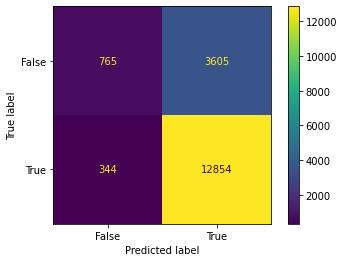

In [90]:
confusion_matrix = metrics.confusion_matrix(Y_test, RF_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [92]:
print(classification_report(Y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.69      0.18      0.28      4370
         1.0       0.78      0.97      0.87     13198

    accuracy                           0.78     17568
   macro avg       0.74      0.57      0.57     17568
weighted avg       0.76      0.78      0.72     17568



# Random Forest (Max 10 features in Bootstraping) 

In [172]:
RF_model3 = RandomForestClassifier(max_depth=10)
RF_model3.fit(X_train,Y_train)
RF_y_preds = RF_model3.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":Y_test})
RF_preds

,Predicted,Actual
21617,0.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [173]:
RF_TP3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP3,RF_FP3,RF_FN3,RF_TN3)
print("Rightly Classified: ",(RF_TP3+RF_TN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))
print("Wrongly Classified: ",(RF_FP3+RF_FN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))

RF_Accuracy3 = (RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3)
RF_Precision3 = (RF_TP3)/(RF_TP3+RF_FP3)
RF_Recall3 = (RF_TP3)/(RF_TP3+RF_FN3)
RF_Specificity3 = (RF_TN3)/(RF_TN3+RF_FP3)
RF_F13 = (2*RF_Precision3*RF_Recall3)/(RF_Precision3+RF_Recall3)

12804 3155 394 1215
Rightly Classified:  14019 / 17568
Wrongly Classified:  3549 / 17568


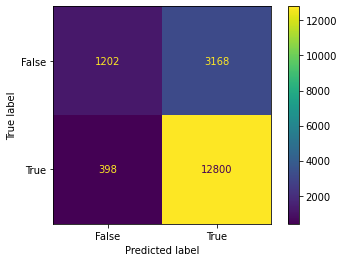

In [100]:
confusion_matrix = metrics.confusion_matrix(Y_test, RF_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [102]:
print(classification_report(Y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.28      0.40      4370
         1.0       0.80      0.97      0.88     13198

    accuracy                           0.80     17568
   macro avg       0.78      0.62      0.64     17568
weighted avg       0.79      0.80      0.76     17568



######SVM (Support Vector Machine)

In [115]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train,Y_train)
SVM_y_preds = SVM_model.predict(X_test)
SVM_preds = pd.DataFrame({"Predicted":SVM_y_preds,"Actual":Y_test})
SVM_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [116]:
SVM_TP = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FP = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FN = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
SVM_TN = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
print(SVM_TP,SVM_FP,SVM_FN,SVM_TN)
print("Rightly Classified: ",(SVM_TP+SVM_TN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))
print("Wrongly Classified: ",(SVM_FP+SVM_FN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))

SVM_Accuracy = (SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)
SVM_Precision = (SVM_TP)/(SVM_TP+SVM_FP)
SVM_Recall = (SVM_TP)/(SVM_TP+SVM_FN)
SVM_Specificity = (SVM_TN)/(SVM_TN+SVM_FP)
SVM_F1 = (2*SVM_Precision*SVM_Recall)/(SVM_Precision+SVM_Recall)

13198 4370 0 0
Rightly Classified:  13198 / 17568
Wrongly Classified:  4370 / 17568


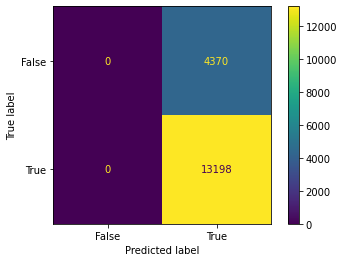

In [117]:
confusion_matrix = metrics.confusion_matrix(Y_test, SVM_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [118]:
print(classification_report(Y_test, SVM_y_preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4370
         1.0       0.75      1.00      0.86     13198

    accuracy                           0.75     17568
   macro avg       0.38      0.50      0.43     17568
weighted avg       0.56      0.75      0.64     17568



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###LGBM_model

In [120]:
from lightgbm import *
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, Y_train)
LGBM_y_preds = LGBM_model.predict(X_test)
LGBM_preds = pd.DataFrame({"Predicted":LGBM_y_preds,"Actual":Y_test})
LGBM_preds

,Predicted,Actual
21617,0.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [121]:
LGBM_TP = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FP = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FN = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
LGBM_TN = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
print(LGBM_TP,LGBM_FP,LGBM_FN,LGBM_TN)
print("Rightly Classified: ",(LGBM_TP+LGBM_TN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))
print("Wrongly Classified: ",(LGBM_FP+LGBM_FN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))

LGBM_Accuracy = (LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_TN+LGBM_FP+LGBM_FN)
LGBM_Precision = (LGBM_TP)/(LGBM_TP+LGBM_FP)
LGBM_Recall = (LGBM_TP)/(LGBM_TP+LGBM_FN)
LGBM_Specificity = (LGBM_TN)/(LGBM_TN+LGBM_FP)
LGBM_F1 = (2*LGBM_Precision*LGBM_Recall)/(LGBM_Precision+LGBM_Recall)

12496 2766 695 1604
Rightly Classified:  14100 / 17561
Wrongly Classified:  3461 / 17561


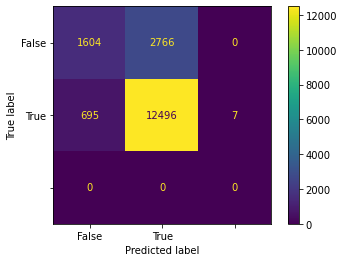

In [124]:
confusion_matrix = metrics.confusion_matrix(Y_test, LGBM_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [123]:
print(classification_report(Y_test, LGBM_y_preds))

              precision    recall  f1-score   support

         0.0       0.70      0.37      0.48      4370
         1.0       0.82      0.95      0.88     13198
         6.0       0.00      0.00      0.00         0

    accuracy                           0.80     17568
   macro avg       0.51      0.44      0.45     17568
weighted avg       0.79      0.80      0.78     17568



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ###xgboost

In [127]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, Y_train)
XGB_y_preds =XGB_model.predict(X_test)
XGB_preds = pd.DataFrame({"Predicted":XGB_y_preds,"Actual":Y_test})
XGB_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,0.0,0.0
...,...,...
21055,0.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [128]:
XGB_TP = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FP = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FN = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
XGB_TN = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
print(XGB_TP,XGB_FP,XGB_FN,XGB_TN)
print("Rightly Classified: ",(XGB_TP+XGB_TN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))
print("Wrongly Classified: ",(XGB_FP+XGB_FN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))

XGB_Accuracy = (XGB_TP+XGB_TN)/(XGB_TP+XGB_TN+XGB_FP+XGB_FN)
XGB_Precision = (XGB_TP)/(XGB_TP+XGB_FP)
XGB_Recall = (XGB_TP)/(XGB_TP+XGB_FN)
XGB_Specificity = (XGB_TN)/(XGB_TN+XGB_FP)
XGB_F1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision+XGB_Recall)

12688 3310 510 1060
Rightly Classified:  13748 / 17568
Wrongly Classified:  3820 / 17568


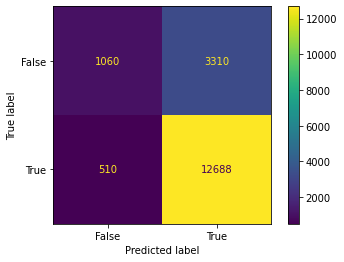

In [129]:
confusion_matrix = metrics.confusion_matrix(Y_test, XGB_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [130]:
print(classification_report(Y_test, XGB_y_preds))

              precision    recall  f1-score   support

         0.0       0.68      0.24      0.36      4370
         1.0       0.79      0.96      0.87     13198

    accuracy                           0.78     17568
   macro avg       0.73      0.60      0.61     17568
weighted avg       0.76      0.78      0.74     17568



In [174]:
comparison = pd.DataFrame({"ML Classification Algo":["Decision_Tree","LGBM Classifier","XGBoosting","Logistic Regression","Random Forest (Max 5 features in Bootstraping)","Random Forest (Max 10 features in Bootstraping)","Gaussian Naive Bayes","KNN (k=10)","KNN (k=50)","SVM (Support Vector Machine)"],
 "Rightly_Classified":[(Decision_TP+Decision_TN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(XGB_TP+XGB_TN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_TP+Log_TN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(nav_TP+nav_TN)/(nav_TP+nav_FP+nav_FN+nav_TN),(KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)],
 "Wrongly_Classified":[(Decision_FP+Decision_FN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_FP+LGBM_FN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(XGB_FP+XGB_FN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_FP+Log_FN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_FP2+RF_FN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_FP3+RF_FN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(nav_FP+nav_FN)/(nav_TP+nav_FP+nav_FN+nav_TN),(KNN_FP1+KNN_FN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_FP2+KNN_FN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(SVM_FP+SVM_FN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)],
 "Accuracy":[Decision_Accuracy,LGBM_Accuracy,XGB_Accuracy,Log_Accuracy,RF_Accuracy2,RF_Accuracy3,NAV_Accuracy ,KNN_Accuracy1,KNN_Accuracy2,SVM_Accuracy],
  "Precision":[Decision_Precision,LGBM_Precision,XGB_Precision,Log_Precision,RF_Precision2,RF_Precision3,NAV_Precision,KNN_Precision1,KNN_Precision2,SVM_Precision],
  "Recall":[Decision_Recall,LGBM_Recall,XGB_Recall,Log_Recall,RF_Recall2,RF_Recall3,NAV_Recall,KNN_Recall1,KNN_Recall2,SVM_Recall],
  "Specificity":[Decision_Specificity,LGBM_Specificity,XGB_Specificity,Log_Specificity,RF_Specificity2,RF_Specificity3,NAV_Specificity,KNN_Specificity1,KNN_Specificity2,SVM_Specificity],
  "F1-Score":[Decision_F1,LGBM_F1,XGB_F1,Log_F1,RF_F12,RF_F13,NAV_F1,KNN_F11,KNN_F12,SVM_F1]})
comparison.sort_values(by="Accuracy",ascending=False).style.background_gradient(cmap='rocket')


,ML Classification Algo,Rightly_Classified,Wrongly_Classified,Accuracy,Precision,Recall,Specificity,F1-Score
1,LGBM Classifier,0.802916,0.197084,0.802916,0.818766,0.947313,0.367048,0.878361
5,Random Forest (Max 10 features in Bootstraping),0.797985,0.202015,0.797985,0.802306,0.970147,0.278032,0.878280
0,Decision_Tree,0.796380,0.203620,0.796380,0.863898,0.865272,0.588330,0.864585
2,XGBoosting,0.782559,0.217441,0.782559,0.793099,0.961358,0.242563,0.869160
4,Random Forest (Max 5 features in Bootstraping),0.774476,0.225524,0.774476,0.779642,0.975527,0.167277,0.866653
6,Gaussian Naive Bayes,0.755692,0.244308,0.755692,0.797065,0.905289,0.303890,0.847737
8,KNN (k=50),0.752561,0.247439,0.752561,0.753712,0.996136,0.016934,0.858131
3,Logistic Regression,0.751252,0.248748,0.751252,0.751252,1.000000,0.000000,0.857960
9,SVM (Support Vector Machine),0.751252,0.248748,0.751252,0.751252,1.000000,0.000000,0.857960
7,KNN (k=10),0.726776,0.273224,0.726776,0.761099,0.927413,0.120824,0.836066


## Hyperparameter Tuning

In [180]:
#Hyperparameterb
from lightgbm import *
n_estimators = [50, 100, 150, 200, 250]
#boosting_type = ['gbdt']

for n in n_estimators:
  LGBM_model = LGBMClassifier(n_estimators = n, boosting_type='gbdt', num_leaves=31)
  LGBM_model.fit(X_train, Y_train)
  LGBM_y_preds = LGBM_model.predict(X_test)
  LGBM_y_accuracy = accuracy_score(LGBM_y_preds,Y_test)
  print(f"n_components = {n} => Accuracy : {LGBM_y_accuracy*100}");

n_components = 50 => Accuracy : 78.42668488160291
n_components = 100 => Accuracy : 80.19125683060109
n_components = 150 => Accuracy : 80.77185792349727
n_components = 200 => Accuracy : 81.10769581056466
n_components = 250 => Accuracy : 81.42645719489981


## MLP Classifiers

In [184]:
 from sklearn.neural_network import MLPClassifier

# Use "for loop" to get accuracies for your set
hidden_layer_size = [10, 50, 100, 300]
activation = ['identity', 'logistic', 'tanh', 'relu']

for n in hidden_layer_size:
  for a in activation:
    #hidden_layer_size = 10
    #activation = 'identity'
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(f"hidden_layer_size = {n}, activation = {a} => Accuracy : {score}");

TypeError: ignored

## Dimensionality Reduction

In [187]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]

for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  LGBM_model = LGBMClassifier()
  LGBM_model.fit(X_dimred_train, Y_train)
  LGBM_y_preds = LGBM_model.predict(X_dimred_test)
  LGBM_y_accuracy = accuracy_score(LGBM_y_preds,Y_test)
  print(f"n_components = {n}=> Accuracy : {LGBM_y_accuracy*100}");

n_components = 8=> Accuracy : 71.7953096539162
n_components = 10=> Accuracy : 71.93761384335154
n_components = 12=> Accuracy : 75.69444444444444
n_components = 14=> Accuracy : 75.4667577413479
n_components = 16=> Accuracy : 79.84403460837886
n_components = 18=> Accuracy : 80.17418032786885
